## Setup

In [58]:
# imports
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import os
import time

from kpca.utils import *
from kpca.kernel_pca import KernelPCA
from kpca.data import Loader, mnist

# ipython
%matplotlib inline 
%load_ext autoreload
%autoreload 2

# cuda
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

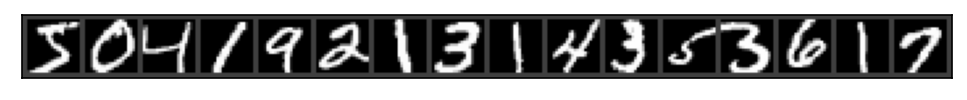

In [9]:
x1,l1,x2,l2,x3,l3 = mnist('cuda')[:6]
x = torch.cat([x1,x2,x3]) # concat train, val, test
x = x[:,:,4:-4,4:-4].contiguous() # crop borders
x = tovec(x) # convert to vec
x /= x.std() # normalize
show_grid(toim(x)[:16],nrow=16)

## Train

In [59]:
# seed 
seed = 0
torch.random.manual_seed(seed)
np.random.seed(seed)

In [60]:
loader = Loader(x,batch_size=64).__iter__()
net = KernelPCA(m=400, n=800, kernel='cos', d=1, lam=1e-3, device='cuda')
info = None

In [61]:
# warmup period
info = net.train(loader,etaq=0.0,etaw=0.01,etal=.1,n_iter=1000,print_iter=10)

0/1000: e=70050.8359, t=0.0188
100/1000: e=-3853.5742, t=1.2983
200/1000: e=56629.4336, t=2.4229
300/1000: e=171749.2188, t=3.5966
400/1000: e=365157.7500, t=4.7287
500/1000: e=665753.6250, t=5.9206
600/1000: e=981135.3750, t=7.1011
700/1000: e=1253018.3750, t=8.2561
800/1000: e=1359122.8750, t=9.3724
900/1000: e=1421539.2500, t=10.5085


In [ ]:
# training 
net.d = 2
info = net.train(loader,etaq=0.0,etaw=.001,etal=0.01,n_iter=10000,print_iter=10,info=info)

0/10000: e=28779562.0000, t=0.0169
1000/10000: e=67724496.0000, t=10.9158
2000/10000: e=6317.3716, t=21.7872
3000/10000: e=3892.5010, t=32.8273
4000/10000: e=4808.6011, t=44.2312
5000/10000: e=3786.8992, t=55.5620
6000/10000: e=3862.9907, t=66.6648
7000/10000: e=5159.7573, t=77.7260
8000/10000: e=3862.2930, t=88.9376


In [ ]:
info = net.train(loader,etaq=0.0,etaw=.0001,etal=0.001,n_iter=10000,print_iter=10,info=info)

## Save Figures

In [57]:
MODEL_PATH = './trained-nets/mnist-d_2.pt'
torch.save(net.state_dict(), MODEL_PATH)

## Training evaluation

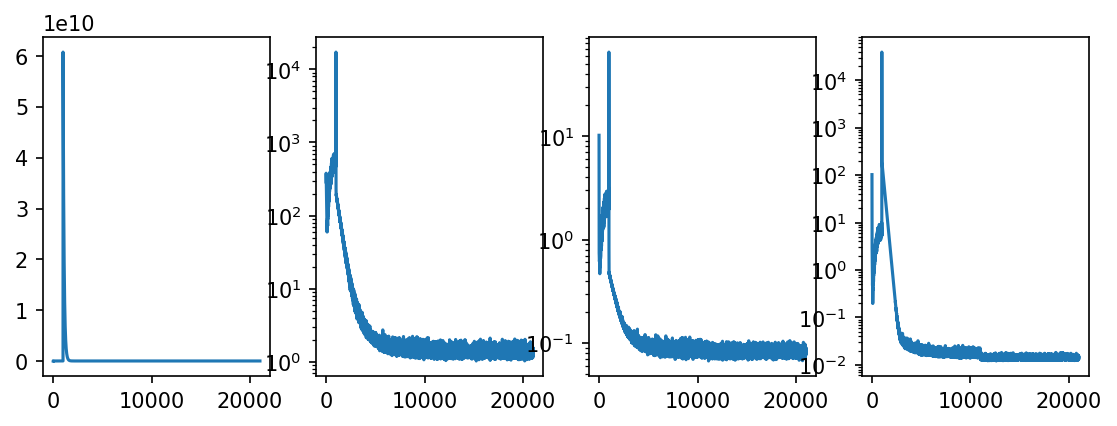

In [55]:
plt.figure(figsize=(9,3),dpi=150)
plt.subplot(141)
plt.plot(info['es'])

plt.subplot(142)
plt.plot(info['gqs'])
plt.yscale('log')

plt.subplot(143)
plt.plot(info['gws'])
plt.yscale('log')

plt.subplot(144)
plt.plot(info['gls'])
plt.yscale('log')

## Visualize the results

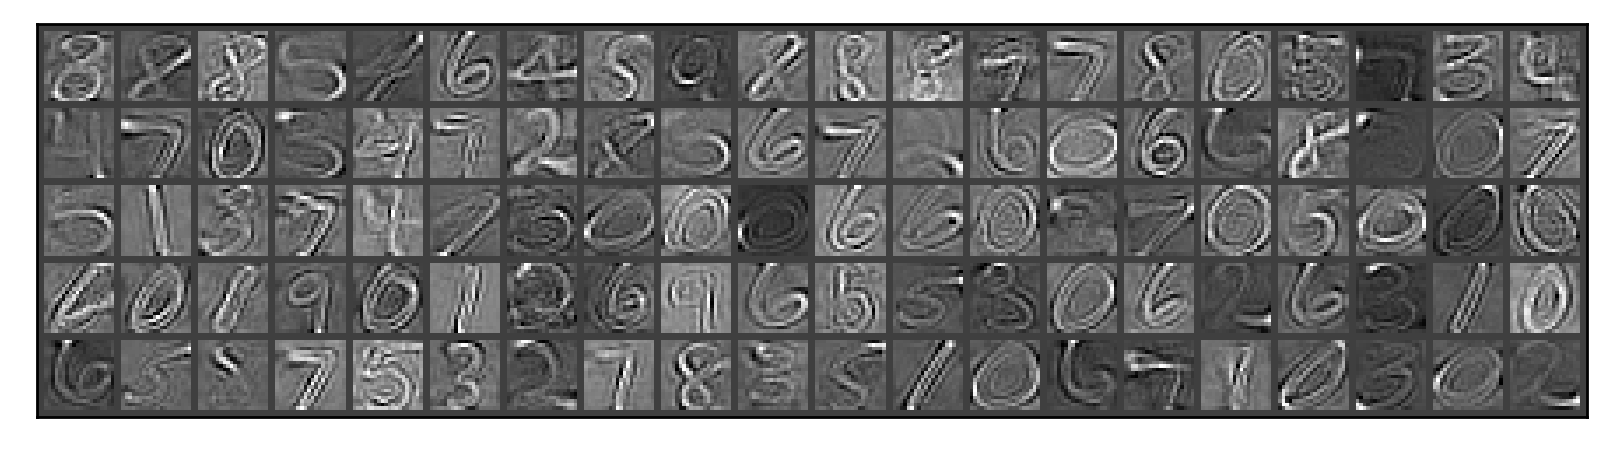

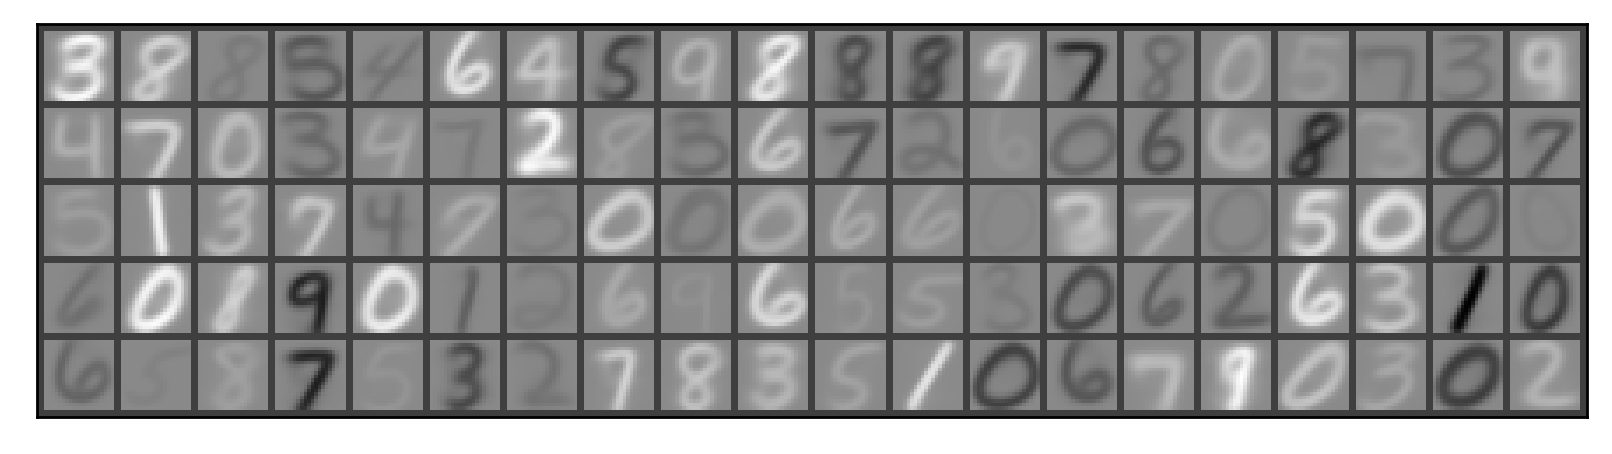

In [56]:
y = net(x)
wf = sta(x,y,1e-1)
show_grid(toim(wf[:100]),nrow=20, dpi=250, norm_every=True)
show_grid(toim(net.w[:100]),nrow=20,dpi=250, norm_every=False)